# Pymaceuticals Inc.
---
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata_df,study_results_df, on='Mouse ID', how='inner')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_data_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids = duplicate_mice['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
duplicate_mice_ids = combined_data_df.loc[combined_data_df['Mouse ID']=='g989']
print(duplicate_mice_ids)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_data_df[combined_data_df['Mouse ID']!='g989']
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame
len(new_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df =new_df.groupby('Drug Regimen')
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume':mean,'Median Tumor Volume':median,'Tumor Volume Variance':variance,'Tumor Volume Std. Dev.':std,'Tumor Volume Std. Err.':sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = new_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median','var', 'std', 'sem']})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
drug_count = new_df['Drug Regimen'].value_counts()

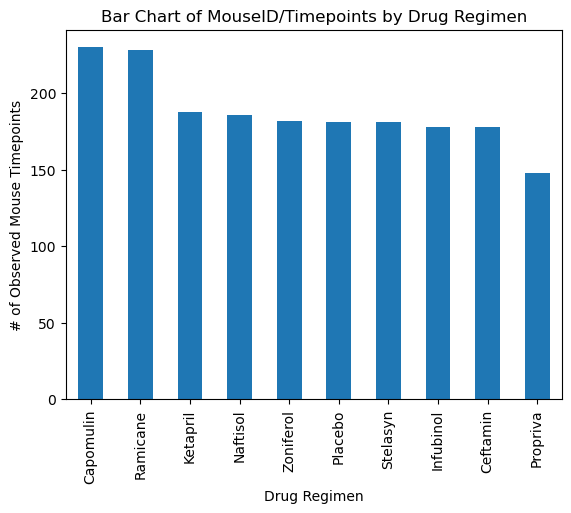

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count.plot.bar(x='Drug Regimen',y='Timepoint')
plt.title('Bar Chart of MouseID/Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

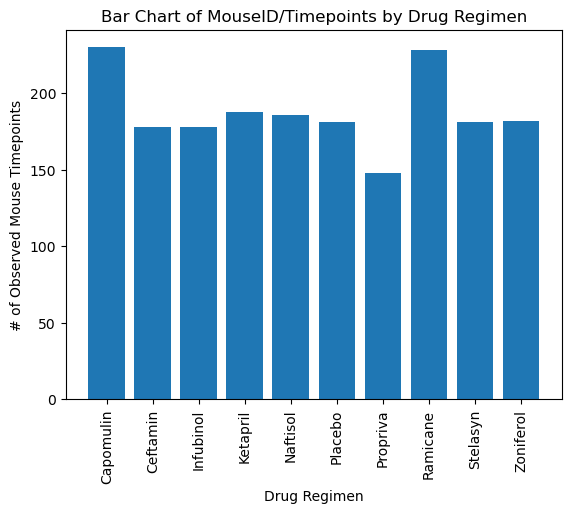

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
unique_values, counts = np.unique(new_df['Drug Regimen'], return_counts=True)
value_counts = np.column_stack((unique_values, counts))
plt.bar(unique_values, counts)
plt.title("Bar Chart of MouseID/Timepoints by Drug Regimen")
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

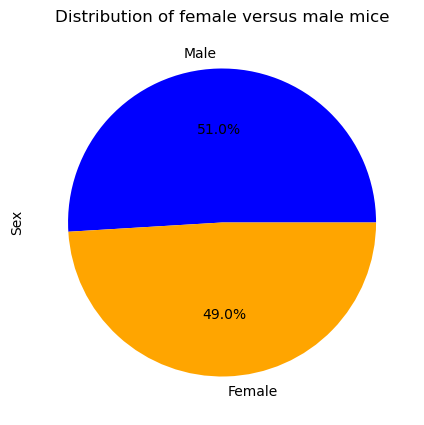

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = new_df['Sex'].value_counts()
colours = ["blue","orange"]
gender_count.plot.pie(subplots=True, figsize=(5,5), colors=colours,autopct='%1.1f%%')
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.show()

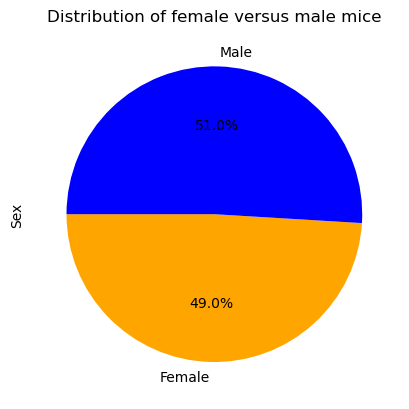

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_values, counts = np.unique(new_df['Sex'], return_counts=True)
colours = ["orange","blue"]
plt.pie(counts,labels=gender_values,colors=colours,autopct='%1.1f%%',startangle=180 )
plt.title("Distribution of female versus male mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Max_group = new_df.groupby(['Mouse ID'])
MaxTime_group_df = Max_group['Timepoint'].max()
MaxTime_group_df = MaxTime_group_df.reset_index()

merged_df = MaxTime_group_df.merge(new_df, on=['Mouse ID','Timepoint'], how='left')

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# with the series use .index 
# # Create empty list to fill with tumor vol data (for plotting)
# .values
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# pandas documentation   
    # Locate the rows which contain mice on each drug and get the tumor volume
    # add subset     
    # Determine outliers using upper and lower bounds

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

for drug in treatments:
    drug_volumes = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volumes.append(drug_volumes)
    quartiles = drug_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_volumes.loc[(drug_volumes < lower_bound) | (drug_volumes > upper_bound)]
    print(f"{drug} potential outliers: {outliers}")



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

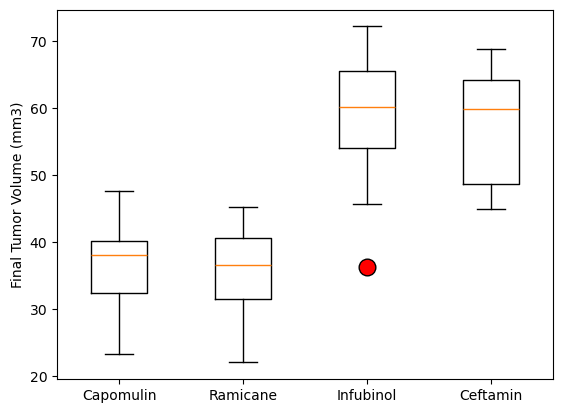

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

reddot = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tumor_volumes,labels=treatments, flierprops=reddot)
plt.ylabel('Final Tumor Volume (mm3)')




In [18]:
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Line and Scatter Plots

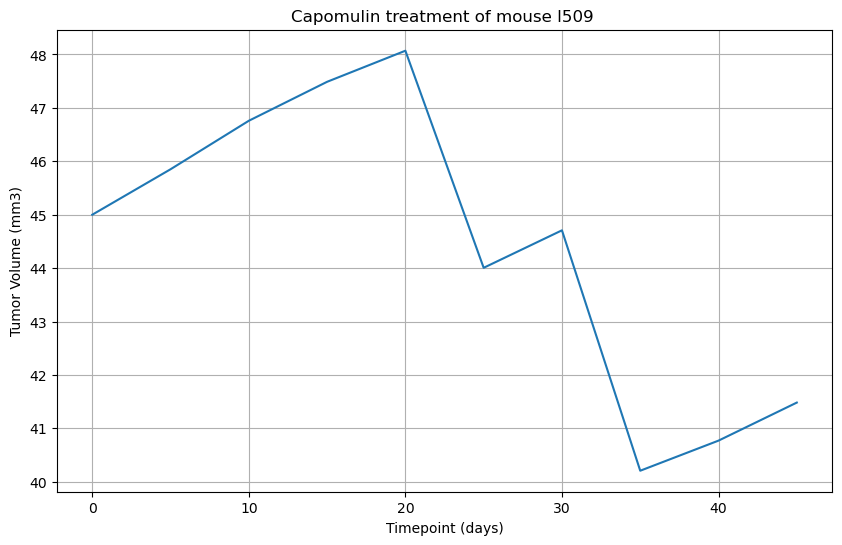

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'
drug = 'Capomulin'
mouse_data = new_df[(new_df['Mouse ID'] == mouse_id) & (new_df['Drug Regimen'] == drug)]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title(f'{drug} treatment of mouse {mouse_id} ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

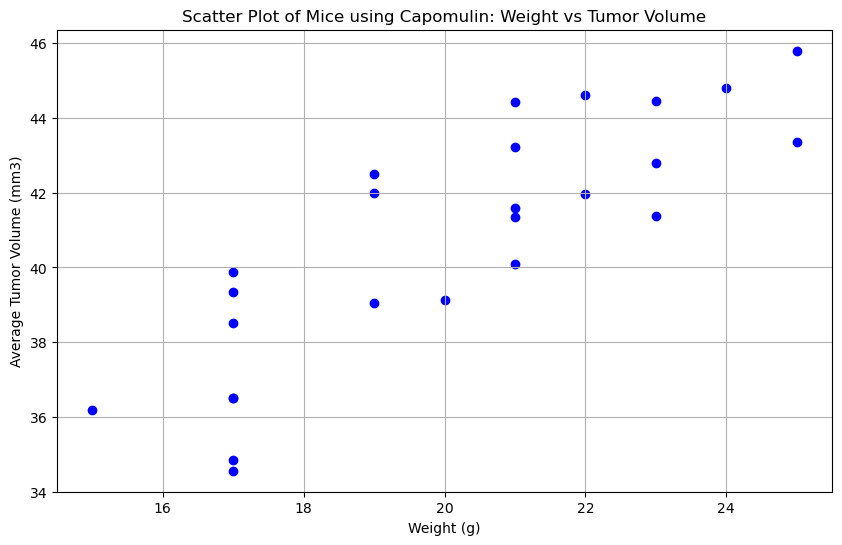

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

drug = new_df.loc[new_df['Drug Regimen'] == 'Capomulin']
mice_avg_data = drug.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(mice_avg_data['Weight (g)'], mice_avg_data['Tumor Volume (mm3)'], color='blue')
plt.title('Scatter Plot of Mice using Capomulin: Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


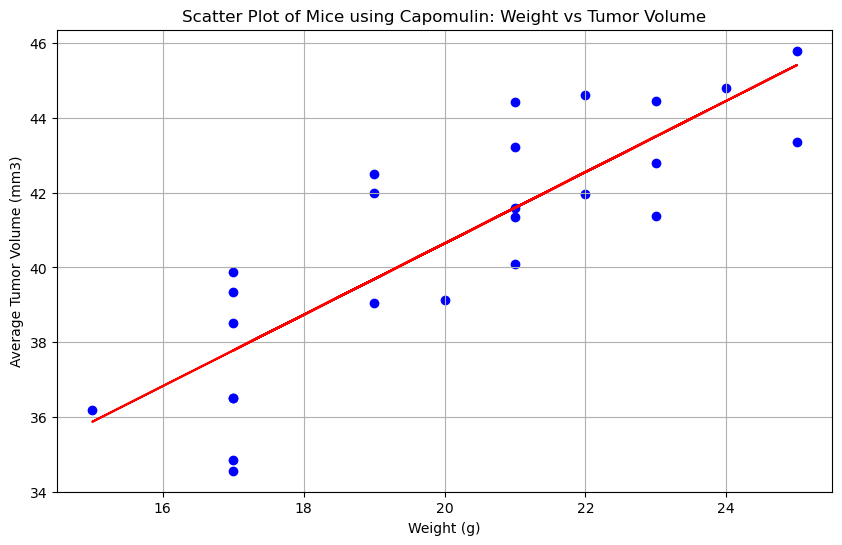

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


In [22]:
drug = new_df.loc[new_df['Drug Regimen'] == 'Capomulin']
mice_avg_data = drug.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean().reset_index()

slope, intercept, r_value, p_value, std_err = st.linregress(mice_avg_data['Weight (g)'], mice_avg_data['Tumor Volume (mm3)'])
plt.figure(figsize=(10, 6))
plt.scatter(mice_avg_data['Weight (g)'], mice_avg_data['Tumor Volume (mm3)'], color='blue')
plt.plot(mice_avg_data['Weight (g)'], intercept + slope * mice_avg_data['Weight (g)'], color='red')
plt.title('Scatter Plot of Mice using Capomulin: Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

correlation = mice_avg_data['Weight (g)'].corr(mice_avg_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")